# Introduction
**This will be your workspace for Kaggle's Machine Learning education track.**

You will build and continually improve a model to predict housing prices as you work through each tutorial.  Fork this notebook and write your code in it.

The data from the tutorial, the Melbourne data, is not available in this workspace.  You will need to translate the concepts to work with the data in this notebook, the Iowa data.

Come to the [Learn Discussion](https://www.kaggle.com/learn-forum) forum for any questions or comments. 

# Write Your Code Below



# Basic Panda Commands

In [39]:
import pandas as pd

main_file_path = '../input/train.csv'
data = pd.read_csv(main_file_path)
print('hello world')

hello world


In [40]:
print(data.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [41]:
print(data.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [42]:
sale = data.SalePrice
print(sale.head())

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


In [43]:
selectedColomnsNames = ['MiscVal','YrSold'];
subDataFrame = data[selectedColomnsNames];
print(subDataFrame.describe())

            MiscVal       YrSold
count   1460.000000  1460.000000
mean      43.489041  2007.815753
std      496.123024     1.328095
min        0.000000  2006.000000
25%        0.000000  2007.000000
50%        0.000000  2008.000000
75%        0.000000  2009.000000
max    15500.000000  2010.000000


# Initial Model

In [44]:
y = data.SalePrice
colomnNames = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'];
X = data[colomnNames]

In [45]:
from sklearn.tree import DecisionTreeRegressor

# Define model
melbourne_model = DecisionTreeRegressor()

# Fit model
melbourne_model.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [46]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

Making predictions for the following 5 houses:
   LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0     8450       2003       856       854         2             3   
1     9600       1976      1262         0         2             3   
2    11250       2001       920       866         2             3   
3     9550       1915       961       756         1             3   
4    14260       2000      1145      1053         2             4   

   TotRmsAbvGrd  
0             8  
1             6  
2             6  
3             7  
4             9  
The predictions are
[208500. 181500. 223500. 140000. 250000.]


# Simple Validation Split

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
# split data into training and validation data, for both predictors and target
# The split is based on a random number generator. Supplying a numeric value to
# the random_state argument guarantees we get the same split every time we
# run this script.
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)
# Define model
melbourne_model = DecisionTreeRegressor()
# Fit model
melbourne_model.fit(train_X, train_y)

# get predicted prices on validation data
val_predictions = melbourne_model.predict(val_X)
print(mean_absolute_error(val_y, val_predictions))

32200.81095890411


In [48]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [49]:
for max_leaf_nodes in [5, 10, 20, 50, 75, 80, 90, 100, 250, 500, 1000, 2500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 10  		 Mean Absolute Error:  30616
Max leaf nodes: 20  		 Mean Absolute Error:  29206
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 75  		 Mean Absolute Error:  27455
Max leaf nodes: 80  		 Mean Absolute Error:  27280
Max leaf nodes: 90  		 Mean Absolute Error:  28284
Max leaf nodes: 100  		 Mean Absolute Error:  28653
Max leaf nodes: 250  		 Mean Absolute Error:  31738
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 1000  		 Mean Absolute Error:  33385
Max leaf nodes: 2500  		 Mean Absolute Error:  33382
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


## Optimal size of leaf node is 80

# Random Forest

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

23662.179386823227


# Test Data

In [51]:
# Read the test data
test = pd.read_csv('../input/test.csv')
# Treat the test data in the same way as training data. In this case, pull same columns.
test_X = test[colomnNames]
# Use the model to make predictions
predicted_prices = forest_model.predict(test_X)
# We will look at the predicted prices to ensure we have something sensible.
#print(predicted_prices)

In [52]:
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
# you could use any filename. We choose submission here
my_submission.to_csv('submission.csv', index=False)

# Handling Missing data

## Removing missing colomns from training and test data
### Not recommended as this would result in bad model creation

In [53]:
cols_with_missing = [col for col in data.columns 
                                 if data[col].isnull().any()]
redued_original_data = data.drop(cols_with_missing, axis=1)
reduced_test_data = test.drop(cols_with_missing, axis=1)

## Imputation
### Taking mean of values

In [54]:
from sklearn.preprocessing import Imputer
# need to tranform categorical data into one hot encoding
#my_imputer = Imputer()
#data_train_with_imputed_values = my_imputer.fit_transform(data)
def score_dataset(X_train, X_test, y_train, y_test): 
    model = RandomForestRegressor() 
    model.fit(X_train, y_train) 
    preds = model.predict(X_test) 
    return mean_absolute_error(y_test, preds)

In [55]:
imputed_X_train_plus = train_X.copy()
imputed_X_val_plus = val_X.copy()

#for col in cols_with_missing:
#    imputed_X_train_plus[col + '_was_missing'] = imputed_X_train_plus[col].isnull()
#    imputed_X_val_plus[col + '_was_missing'] = imputed_X_val_plus[col].isnull()

# Imputation
my_imputer = Imputer()
imputed_X_train_plus = my_imputer.fit_transform(imputed_X_train_plus)
imputed_X_val_plus = my_imputer.transform(imputed_X_val_plus)

print("Mean Absolute Error from Imputation while Track What Was Imputed:")
print(score_dataset(imputed_X_train_plus, imputed_X_val_plus, train_y, val_y))

Mean Absolute Error from Imputation while Track What Was Imputed:
24291.300547945204


# One Hot Encoding

In [56]:
predictors_without_categoricals = train_X.select_dtypes(exclude=['object'])
# get one hot encoded variables
# TODO: get all the coloumns in the data and select some categorical coloumns that are important and can be changed into one hot encoded data
one_hot_encoded_training_predictors = pd.get_dummies(train_X)
print(predictors_without_categoricals.columns)
print(one_hot_encoded_training_predictors.columns)

Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')
Index(['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath',
       'BedroomAbvGr', 'TotRmsAbvGrd'],
      dtype='object')


In [57]:
def getScore(data,colmnNames):
    my_imputer = Imputer()
    X = data[colomnNames]
    one_hot_encoded_training_predictors = pd.get_dummies(X)
    train_X, val_X, train_y, val_y = train_test_split(one_hot_encoded_training_predictors, y,random_state = 1)
    train_X_copy = train_X.copy()
    val_X_copy = val_X.copy()
    cols_with_missing = [col for col in one_hot_encoded_training_predictors.columns 
                                     if one_hot_encoded_training_predictors[col].isnull().any()]
    for col in cols_with_missing:
        train_X_copy[col + '_was_missing'] = train_X_copy[col].isnull()
        val_X_copy[col + '_was_missing'] = val_X_copy[col].isnull()
    imputed_X_train = my_imputer.fit_transform(train_X_copy)
    imputed_X_val = my_imputer.transform(val_X_copy)
    return (score_dataset(imputed_X_train, imputed_X_val, train_y, val_y))

## categorical data added to the model

In [58]:
main_file_path = '../input/train.csv'
data = pd.read_csv(main_file_path)
colomnNames = ['LotConfig','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'];
getScore(data,colomnNames)
categoricalCol = data.select_dtypes('object').columns
print(categoricalCol)
print('without category', getScore(data,colomnNames))
for cat in categoricalCol:
    print('score for', cat, getScore(data,colomnNames + [cat]),getScore(data,colomnNames + [cat]),getScore(data,colomnNames + [cat]))

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
without category 23677.156255707763
score for MSZoning 23061.996712328768 23822.115707762554 23046.83607305936
score for Street 23128.652602739723 23256.758995433785 23576.36401826484
score for Alley 23835.28739726027 23676.901056751467 22951.037038486626
score for LotShape 23940.39899543379 23030.321917808218 24250.650593607304
scor

In [59]:
colomnNames = ['LotConfig','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'];
print('without category', getScore(data,colomnNames))
print('with category', getScore(data,colomnNames + ['MSZoning']))


without category 22589.864292237442
with category 22749.60703196347


## XGBoost model

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer

data = pd.read_csv('../input/train.csv')
data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

my_imputer = Imputer()
train_X = my_imputer.fit_transform(train_X)
test_X = my_imputer.transform(test_X)

from xgboost import XGBRegressor

my_model =XGBRegressor(n_estimators=1000, learning_rate=0.05)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(train_X, train_y, early_stopping_rounds=5, 
             eval_set=[(test_X, test_y)], verbose=False)

# make predictions
predictions = my_model.predict(test_X)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, test_y)))

Mean Absolute Error : 16077.965753424658


In [61]:
print(X.columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')


plot_partial_dependence. The feature_names is an array, where the first column is compared with all the other colomns. Here we have selected 3 features so the first feature is compared with the other two and we can see 2 graphs

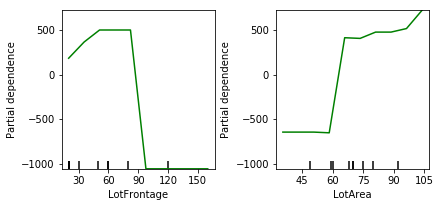

In [62]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
my_model = GradientBoostingRegressor()
# fit the model as usual
my_imputer = Imputer()
X = my_imputer.fit_transform(X)
my_model.fit(X, y)

# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[1, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['MSSubClass', 'LotFrontage', 'LotArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

# Pipeline

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer

def getPipelineScore(data, colomnNames):
    my_imputer = Imputer()
    X = data[colomnNames]
    one_hot_encoded_training_predictors = pd.get_dummies(X)
    train_X, val_X, train_y, val_y = train_test_split(one_hot_encoded_training_predictors, y,random_state = 1)
    train_X_copy = train_X.copy()
    val_X_copy = val_X.copy()
    cols_with_missing = [col for col in one_hot_encoded_training_predictors.columns 
                                     if one_hot_encoded_training_predictors[col].isnull().any()]
    for col in cols_with_missing:
        train_X_copy[col + '_was_missing'] = train_X_copy[col].isnull()
        val_X_copy[col + '_was_missing'] = val_X_copy[col].isnull()
        
    my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
    my_pipeline.fit(train_X_copy, train_y)
    predictions = my_pipeline.predict(val_X_copy)
    return mean_absolute_error(predictions, val_y)

In [64]:
colomnNames = ['LotConfig','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'];
print('without category', getPipelineScore(data,colomnNames))
print('with category', getPipelineScore(data,colomnNames + ['MSZoning']))

without category 24000.616712328767
with category 23798.250776255703


## Cross Validation

In [65]:
from sklearn.model_selection import cross_val_score
import pandas as pd
data = pd.read_csv('../input/train.csv')

colomnNames = ['LotConfig','LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd'];
X = data[colomnNames]
one_hot_encoded_training_predictors = pd.get_dummies(X)
y = data.SalePrice
my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())
scores = cross_val_score(my_pipeline, one_hot_encoded_training_predictors, y, scoring='neg_mean_absolute_error')
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 24556.861220


## Leakage 
Leakage occures when we change the data after the model is fit. Or if we apply some pre processing to the data.

Another type of leakage is when we use data parameters that highly correlate with the target parameter.

One way to spot leakage is to check the accuracy of the model. If the model is providing high accuracy constantly than there is some issue and the parameters of the model should be checked